# Lecture 4 - Selecting Rows

In [1]:
#: the usual imports
from datascience import *
import numpy as np

In [2]:
#: let's have some data to work with
nba = Table.read_table('nba_salaries.csv')
nba

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


# Digression: Lists

Let's make an array, but have it hold objects of different types:

In [3]:
data = make_array(1, 3.1415, 'n/a')
data

array(['1', '3.1415', 'n/a'], dtype='<U32')

Wait, what is the type of the first element?

In [4]:
type(data.item(0))

str

## Lists are generic sequences

- Arrays should only hold objects of one type.
- But `list`s can hold things of different types.

In [5]:
[1, 3.1415, 'hey']

[1, 3.1415, 'hey']

## Why use arrays instead of lists?

Big reason: arrays are fast.

In [6]:
#: an array and a list with the same data
n = 9_999_999
arr = np.arange(n)
lst = list(range(n))

In [7]:
%timeit arr.sum()

6.19 ms ± 248 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit sum(lst)

91.5 ms ± 949 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Creating tables from lists

Passing a list to `.with_column` converts it to an array implicity.

In [9]:
data = Table().with_column('Stuff', [1, 3.1415, 'hey'])
data

Stuff
1
3.1415
hey


But look at the types...

In [10]:
data.column('Stuff')

array(['1', '3.1415', 'hey'], dtype='<U32')

# Getting rows

## Another `.take()`...

- We know that `.select()` returns a table with the requested columns.
- To get a *table* with requested rows, use `.take()`
- As with `.item()`, counting starts with 0!

In [11]:
nba

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [12]:
# get the first element
nba.take(0)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


## Multiple rows

Take multiple rows by providing a list:

In [13]:
nba.take([0, 5, 6])

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333


In [14]:
#: indices have to be in a list!
nba.take(0, 5, 6)

TypeError: __call__() takes 2 positional arguments but 4 were given

## Discuss

For columns, we have:

- `.select()`: returns a table
- `.column()`: returns and array

For rows, we just have:

- `.take()`: returns a table

Why don't we have something that returns a row as an array?

# Retrieving rows conditionally

- We want to grab a subset of rows conditionally.
- Examples:
    - All NBA players who make over 20 million / year.
    - All point guards (PGs) and centers (Cs).
    - Any player with more than 20 letters in their name

## Predicates

- A predicate is a function that returns `True` or `False`.
- Apply predicate to each item in a column.
- Keep entries for which it is `True`.
- Discard those for which it is `False`.

## The `.where()` method

- Applies a predicate over a column.
- Returns new table.
- Many predicates are provided.

In [15]:
nba.where("'15-'16 SALARY", are.above(20))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
LeBron James,SF,Cleveland Cavaliers,22.9705
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


## Provided predicates

|Predicate|Description|
|---------|-----------|
|`are.above(y)`|Greater than y|
|`are.above_or_equal_to(y)`|Greater than or equal to y|
|`are.below(y)`|Less than y|
|`are.below_or_equal_to(y)`|Less than or equal to y|
|`are.between(y, z)`|Greater than or equal to y and less than z|
|`are.between_or_equal_to(y, z)`|Greater than or equal to y and less than or equal to z|
|`are.contained_in(superstring)`|A string that is part of the given superstring|
|`are.containing(substring)`|A string that contains within it the given substring|
|`are.equal_to(y)`|Equal to y|
|`are.not_above(y)`|Is not above |
|`are.not_above_or_equal_to(y)`|Is neither above y nor equal to |
|`are.not_below(y)`|Is not below |
|`are.not_below_or_equal_to(y)`|Is neither below y nor equal to |
|`are.not_between(y, z)`|Is equal to y or less than y or greater than |
|`are.not_between_or_equal_to(y, z)`|Is less than y or greater than |
|`are.not_contained_in(superstring)`|A string that is not contained within the superstrin|
|`are.not_containing(substring)`|A string that does not contain substrin|
|`are.not_equal_to(y)`|Is not equal to |
|`are.not_strictly_between(y, z)`|Is equal to y or equal to z or less than y or greater than |
|`are.strictly_between(y, z)`|Greater than y and less than z|

## Example

Get Lebron's row.

In [16]:
nba.where('PLAYER', are.equal_to('LeBron James'))

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,SF,Cleveland Cavaliers,22.9705


`are.equal_to` is the default behavior:

In [17]:
nba.where('PLAYER', 'LeBron James')

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,SF,Cleveland Cavaliers,22.9705


## Example

Grab all players with a salary between 5 and 6 million.

In [18]:
nba.where("'15-'16 SALARY", are.between(5, 6))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Kyle Korver,SG,Atlanta Hawks,5.74648
Jonas Jerebko,PF,Boston Celtics,5
Courtney Lee,SG,Charlotte Hornets,5.675
Nikola Mirotic,PF,Chicago Bulls,5.54373
Deron Williams,PG,Dallas Mavericks,5.37897
Zaza Pachulia,C,Dallas Mavericks,5.2
JJ Hickson,C,Denver Nuggets,5.6135
Shaun Livingston,PG,Golden State Warriors,5.54373
Chase Budinger,SF,Indiana Pacers,5
Jamal Crawford,SG,Los Angeles Clippers,5.675


## Example

Grab all of the Golden State Warriors players.

In [19]:
nba.where('TEAM', are.containing('Golden State'))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


## Example

Find all teammates of LeBron James.

In [20]:
lebron = nba.where('PLAYER', are.containing('LeBron'))
team = lebron.column('TEAM').item(0)
nba.where('TEAM', team)

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,SF,Cleveland Cavaliers,22.9705
Kevin Love,PF,Cleveland Cavaliers,19.689
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
Tristan Thompson,C,Cleveland Cavaliers,14.2609
Brendan Haywood,C,Cleveland Cavaliers,10.5225
Iman Shumpert,SG,Cleveland Cavaliers,8.98876
Timofey Mozgov,C,Cleveland Cavaliers,4.95
Mo Williams,PG,Cleveland Cavaliers,2.1
Sasha Kaun,C,Cleveland Cavaliers,1.276
Matthew Dellavedova,PG,Cleveland Cavaliers,1.14728


## Predicates are functions!

In [21]:
# this creates a new function, f
f = are.above(30)

In [22]:
f(31)

True

In [23]:
f(29)

False

## Looking ahead: creating own predicates

In Python, as in most languages, you can create your own functions.

In [24]:
#: we can define our own predicates...
def name_is_20_or_more_letters(name):
    return len(name) >= 20

In [25]:
nba.where('PLAYER', name_is_20_or_more_letters)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Rondae Hollis-Jefferson,SG,Brooklyn Nets,1.33548
Michael Kidd-Gilchrist,SF,Charlotte Hornets,6.3314
Kentavious Caldwell-Pope,SG,Detroit Pistons,2.89176
Michael Carter-Williams,PG,Milwaukee Bucks,2.39904
Giannis Antetokounmpo,SF,Milwaukee Bucks,1.95396
Thanasis Antetokounmpo,SF,New York Knicks,0.030888


# Discussion Question

`.with_row()` works like `.with_column()`...

The table `nba` has columns `PLAYER`, `POSITION`, `TEAM`, `SALARY`.

What is the output when we execute a cell containing these two lines of code?

```
nba.with_row(['Jazz Bear', 'Mascot', 'Utah Jazz', 100])
nba.where('PLAYER', are.containing('Bear'))
```

* A. A table with one row for Jazz Bear
* B. An empty table with no rows
* C. An error message

# Practice: Census data

- Every ten years, the U.S. Census Bureau counts the number of people in the U.S.
- On other years, the bureau *estimates* the population
- Data is published online

## What does the file look like?

In [26]:
# prints the first few lines of the file
!head census.csv

## Read the data from disk

In [27]:
#: the usual code...
census = Table.read_table('census.csv')
census

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


## Or, read the data from a URL directly

In [28]:
#: the url to the data file
url = 'http://inferentialthinking.com/notebooks/nc-est2015-agesex-res.csv'

In [29]:
# download the data from the World Wide Web
census = Table.read_table(url)
census

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


## What do we have?

A description of the dataset is available at [census.gov](https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.pdf).

Unfortunately...

<center>
<img src="./moved.png" width=50%>
</center>

## What are the column labels?

In [30]:
census.labels

('SEX',
 'AGE',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015')

## What values occur in each column?

Use `np.unique` to get the unique values.

In [31]:
# what ages occur in the data?
np.unique(census.column('AGE'))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999])

Wait, `999`?

## What is `999` used for?

In [32]:
census.where('AGE', 999)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,999,308745538,308758105,309346863,311718857,314102623,316427395,318907401,321418820
1,999,151781326,151788777,152088043,153291772,154521077,155706770,156955337,158229297
2,999,156964212,156969328,157258820,158427085,159581546,160720625,161952064,163189523


- It looks like `999` means *all ages together*.
- Similarly, a `SEX` of `0` means *all sexes together*.

## Discuss

Using the data alone, how might we make an educated guess as to which value of `SEX` means "male" and which means "female"?

In [33]:
census.where('AGE', 87)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,87,712908,713046,721196,741551,756097,751513,768676,774639
1,87,249803,249840,253621,261735,269496,272275,282423,287383
2,87,463105,463206,467575,479816,486601,479238,486253,487256


- Women tend to live longer. This suggests that `1` is "male" and `2` is "female".

## Analyzing population trends

Let's look at how the population changed between 2010 and 2015.

In [34]:
# we only need a few columns
us_pop = census.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')

In [35]:
# we don't like to type POPESTIMATE2010. something shorter...
us_pop = us_pop.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


## Population changes

Compute absolute and percentage changes.

In [36]:
us_pop = us_pop.with_column(
    'CHANGE',
    us_pop.column('2015') - us_pop.column('2010')
)

In [37]:
us_pop = us_pop.with_column(
    'PCT CHANGE',
    us_pop.column('CHANGE') / us_pop.column('2010')
    )
us_pop

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,0,3951330,3978038,26708,0.00675924
0,1,3957888,3968564,10676,0.0026974
0,2,4090862,3966583,-124279,-0.0303797
0,3,4111920,3974061,-137859,-0.0335267
0,4,4077551,4020035,-57516,-0.0141055
0,5,4064653,4018158,-46495,-0.0114389
0,6,4073013,4019207,-53806,-0.0132104
0,7,4043046,4148360,105314,0.0260482
0,8,4025604,4167887,142283,0.0353445
0,9,4125415,4133564,8149,0.00197532


## Display percentages nicely

In [38]:
us_pop.set_format('PCT CHANGE', PercentFormatter)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,0,3951330,3978038,26708,0.68%
0,1,3957888,3968564,10676,0.27%
0,2,4090862,3966583,-124279,-3.04%
0,3,4111920,3974061,-137859,-3.35%
0,4,4077551,4020035,-57516,-1.41%
0,5,4064653,4018158,-46495,-1.14%
0,6,4073013,4019207,-53806,-1.32%
0,7,4043046,4148360,105314,2.60%
0,8,4025604,4167887,142283,3.53%
0,9,4125415,4133564,8149,0.20%


## Discussion Question

In [39]:
#: Given this data...
us_pop.where('AGE', 999).where('SEX', 0)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,999,309346863,321418820,12071957,3.90%


What does this code calculate?

`(321418820 / 309346863) ** (1/5) - 1`

|Responses|
|---------|
|A. The ratio of the population in 2015 to the population in 2010.|
|B. The precentage by which the population changed from 2010 to 2015.|
|C. The annual growth rate for the population from 2010 to 2015.|
|D. It doesn't compute anything meaningful.|

## What age group(s) grew the most in size?

1. Any guesses?
2. How could we find out?

In [40]:
us_pop.sort('CHANGE', descending=True)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,999,309346863,321418820,12071957,3.90%
1,999,152088043,158229297,6141254,4.04%
2,999,157258820,163189523,5930703,3.77%
0,68,2359816,3436357,1076541,45.62%
0,64,2706055,3536156,830101,30.68%
0,65,2678525,3450043,771518,28.80%
0,66,2621335,3344134,722799,27.57%
0,67,2693707,3304187,610480,22.66%
0,72,1883820,2469605,585785,31.10%
2,68,1254117,1812428,558311,44.52%


## Why?

In [41]:
2010 - 68

1942

In [42]:
2015 - 68

1947

The post-WWII baby boom.

## How does female:male ratio change with age?

General approach:

1. Keep data for only one year (say, 2015).
2. Make a table of females and a table of males.
3. Divide # of females at age by # of males at age

## 1. Keep data for only 2015

In [43]:
us_pop_2015 = us_pop.select('SEX', 'AGE', '2015')
us_pop

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,0,3951330,3978038,26708,0.68%
0,1,3957888,3968564,10676,0.27%
0,2,4090862,3966583,-124279,-3.04%
0,3,4111920,3974061,-137859,-3.35%
0,4,4077551,4020035,-57516,-1.41%
0,5,4064653,4018158,-46495,-1.14%
0,6,4073013,4019207,-53806,-1.32%
0,7,4043046,4148360,105314,2.60%
0,8,4025604,4167887,142283,3.53%
0,9,4125415,4133564,8149,0.20%


## 2. Make a table of females and a table of males

In [44]:
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))

In [45]:
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))

## 3. Divide # of females at age by # of males at same age

In [46]:
# we have to "align" the data first (if it isn't already aligned)
females = females.sort('AGE')
males = males.sort('AGE')

In [47]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    'F:M RATIO', females.column('2015') / males.column('2015')
)
ratios

AGE,F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


## Visualize

In [48]:
#: a few new imports
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

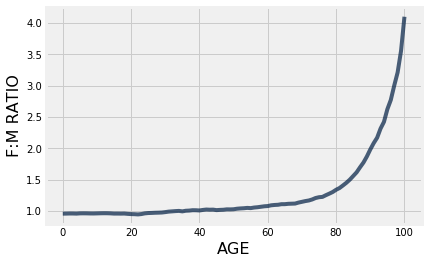

In [49]:
ratios.plot('AGE')